In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import PyPDF2

# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [8]:
df = pd.read_csv('sinasc_RO_2019.csv')

with open('Estrutura_SINASC_para_CD.pdf', 'rb') as file:
    pdf_reader = PyPDF2.PdfReader(file)

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

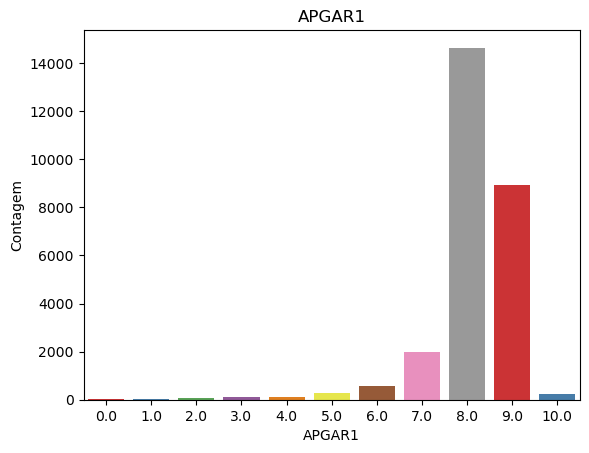

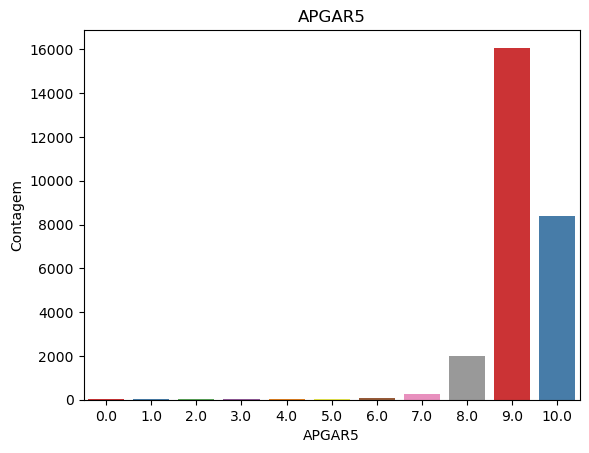

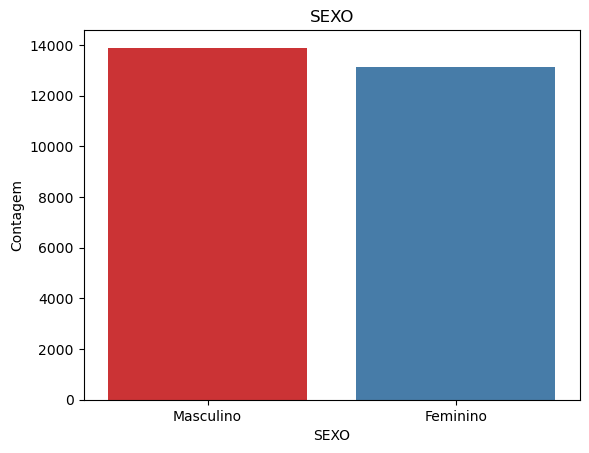

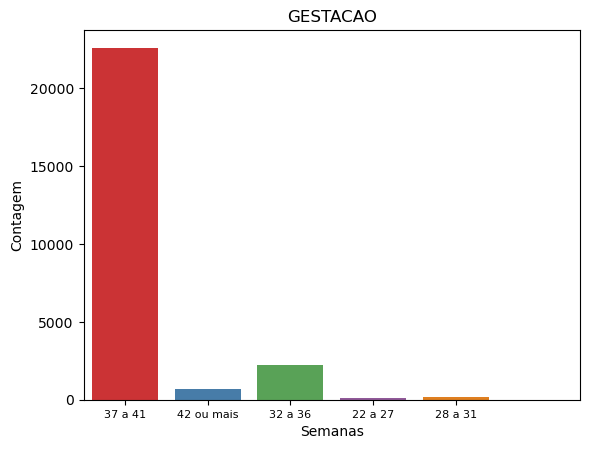

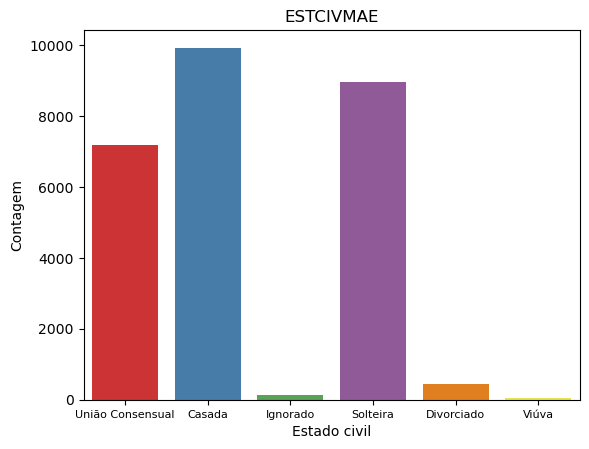

In [42]:
colunas = ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']



for coluna in colunas:
    plt.figure()
    if coluna == 'GESTACAO':
        sns.countplot(data=df, x=coluna, palette='Set1')
        plt.xlabel('Semanas')
        plt.xticks([0, 1, 2, 3, 4], ['37 a 41', '42 ou mais', '32 a 36', '22 a 27', '28 a 31'], fontsize=8)
    elif coluna == 'ESTCIVMAE':
        sns.countplot(data=df, x=coluna, palette='Set1')
        plt.xlabel('Estado civil')
        plt.xticks(fontsize=8)
    else:
        sns.countplot(data=df, x=coluna, palette='Set1')
        
    plt.title(coluna)
    plt.ylabel('Contagem')

plt.show()


In [34]:
#print(df.columns)

#valores_estcivmae = df['ESTCIVMAE'].unique()
#print(valores_estcivmae)

#frequencia_gestacao = df['GESTACAO'].value_counts()
#print(frequencia_gestacao)


   Estado Civil  Contagem
0           2.0      9924
1           1.0      8952
2           5.0      7180
3           4.0       453
4           9.0       145
5           3.0        57


#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

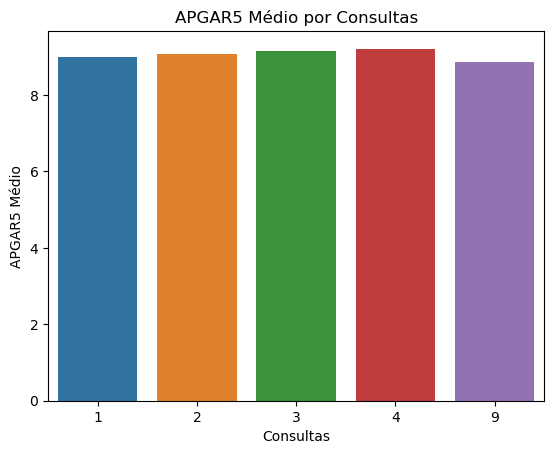

In [43]:
apgarmedio_consultas = df.groupby('CONSULTAS')['APGAR5'].mean().reset_index()

plt.figure()
sns.barplot(data=apgarmedio_consultas, x='CONSULTAS', y='APGAR5')
plt.xlabel('Consultas')
plt.ylabel('APGAR5 Médio')
plt.title('APGAR5 Médio por Consultas')

plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

**OBS.:** ACIMA ESTAVA DIZENDO QUE ERA PARA MONTAR UM PAINEL COM 4 GRÁFICOS MOSTRANDO FREQUÊNCIAS DE SEXO, GESTAÇÃO, ESTCIVMAE E CONSULTAS, MAS NÃO FAZ SENTIDO SER ESTA A PERGUNTA PORQUE 3 DOS 4 GRÁFICOS PEDIDOS JÁ ESTÃO REPRESENTADOS NO EXERCÍCIO ANTERIOR, ENTÃO JULGUEI SER MONTAR UM PAINEL MOSTRANDO AS FREQUÊNCIAS DE SEXO, GESTACAO E ESTCIVMAE **POR** CONSULTAS E ASSIM REALIZEI O EXERCÍCIO ABAIXO.

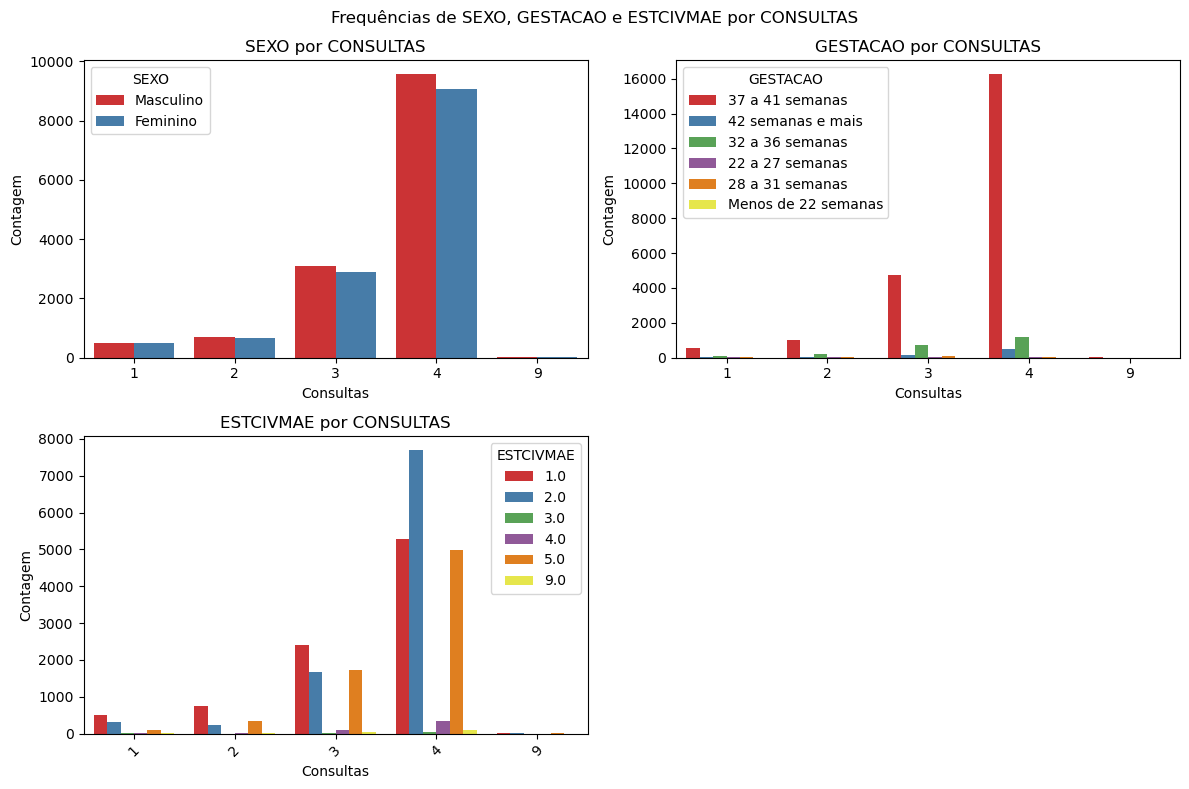

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Frequências de SEXO, GESTACAO e ESTCIVMAE por CONSULTAS')


sns.countplot(data=df, x='CONSULTAS', hue='SEXO', palette='Set1', ax=axs[0, 0])
axs[0, 0].set_title('SEXO por CONSULTAS')
axs[0, 0].set_xlabel('Consultas')
axs[0, 0].set_ylabel('Contagem')


sns.countplot(data=df, x='CONSULTAS', hue='GESTACAO', palette='Set1', ax=axs[0, 1])
axs[0, 1].set_title('GESTACAO por CONSULTAS')
axs[0, 1].set_xlabel('Consultas')
axs[0, 1].set_ylabel('Contagem')


sns.countplot(data=df, x='CONSULTAS', hue='ESTCIVMAE', palette='Set1', ax=axs[1, 0])
axs[1, 0].set_title('ESTCIVMAE por CONSULTAS')
axs[1, 0].set_xlabel('Consultas')
axs[1, 0].set_ylabel('Contagem')
axs[1, 0].tick_params(axis='x', rotation=45)


fig.delaxes(axs[1, 1])

plt.tight_layout()

plt.show()
